<!-- | Step            | Meaning                    |
| --------------- | -------------------------- |
| Standardization | Put features on same scale |
| PCA fit         | Find new orthogonal axes   |
| Eigenvalues     | Measure importance         |
| Projection      | Rotate + compress          |
| Reconstruction  | Approximate original       |

<!-- PCA implementation -->

<!-- Standardize  - compute covariance matrix-find eigen values and vectors - use det(E-Lambda*I) = 0 and finallu Z = X.PC1 --> 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Synthetic dataset: 2 correlated features
n_samples = 200

hours_studied = np.random.normal(5, 2, n_samples)
exam_score = 10 * hours_studied + np.random.normal(0, 5, n_samples)

X = np.column_stack((hours_studied, exam_score))


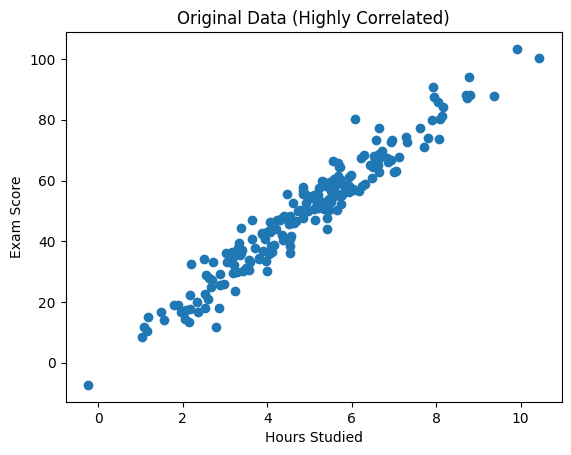

In [2]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Original Data (Highly Correlated)")
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [7]:
print("Principal components:")
print(pca.components_)


Principal components:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [11]:
print("Explained variance:")
print(pca.explained_variance_)


Explained variance:
[1.97833727 0.03171298]


In [8]:
pca_1d = PCA(n_components=1)
X_1d = pca_1d.fit_transform(X_scaled)

print(X_1d[:5])


[[ 0.84473169]
 [-0.05895912]
 [ 1.19868656]
 [ 2.48951714]
 [-0.54949831]]


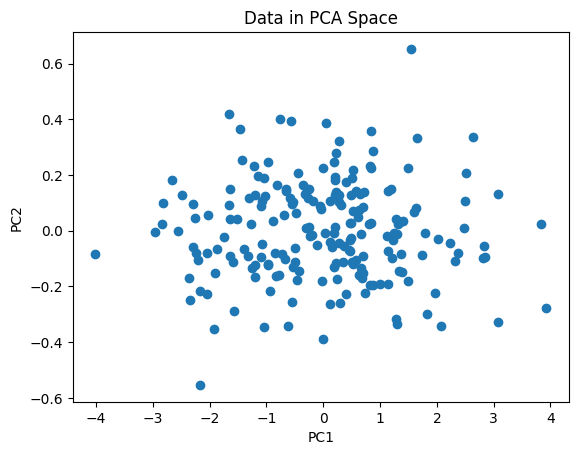

In [9]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data in PCA Space")
plt.show()


In [10]:
X_reconstructed = pca_1d.inverse_transform(X_1d)
X_reconstructed = scaler.inverse_transform(X_reconstructed)
